In [21]:
import time

import numpy as np

from datetime import datetime

from citipy import citipy

from config import weather_api_key

import requests

import pandas as pd

In [22]:
#Warning there are 500 cities in this code block

city_names_list = []

cities_data = []


# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=600)
lngs = np.random.uniform(low=-180.000, high=180.000, size=600)
lat_lngs = zip(lats, lngs)
lat_lngs

coordinates = list(lat_lngs)

for coordinate in coordinates:
    
    try:
        city_name = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
        city_names_list.append(city_name)
        #print(city_name)
        #city_data["name"] = city_name_list
        
        #we dont need country code
        #country_code = citipy.nearest_city(coordinate[0],coordinate[1]).country_code
        #country_code_list.append(country_code)
        #city_data["country_code"] = country_code
        #print(country_code)
        #city_data["country_code"] = country_code_list
        
    except:
        #print("this was not a geo location with a city")
        cities_data["name"] = "not a city"
        
#city_names_list

In [23]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [24]:


# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


#we are running queries on each city in batches because we can only access 50 cities before a 60 second ban
# is placed
# then, after the 60 second pause, we can start submitting queries again. So, we use time.sleep(60) to pause
#our code


for i, city in enumerate(city_names_list):
    
    #this part of the code first checks to see if i = 50, and it will set a pause timer
    
    if (i % 50 == 0 and i>=50):
        set_count +=1
        
        record_count = 1
        
        time.sleep(60)
        
#the code below is the actual query part for looking up the cities    
        
# Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
        
    record_count += 1
    

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | rawson
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | bakchar
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | clyde river
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | ipaussu
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | lavrentiya
Processing Record 16 of Set 1 | alpena
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | cabo san lucas
Processing Record 19 of Set 1 | bilma
Processing Record 20 of Set 1 | nuevo progreso
Processing Record 21 of Set 1 | ushuaia
Processing Rec

Processing Record 38 of Set 4 | mataura
Processing Record 39 of Set 4 | bethel
Processing Record 40 of Set 4 | atuona
Processing Record 41 of Set 4 | bengkulu
Processing Record 42 of Set 4 | ushuaia
Processing Record 43 of Set 4 | seoul
Processing Record 44 of Set 4 | margate
Processing Record 45 of Set 4 | rudraprayag
Processing Record 46 of Set 4 | jiddah
City not found. Skipping...
Processing Record 47 of Set 4 | jamestown
Processing Record 48 of Set 4 | albany
Processing Record 49 of Set 4 | meyungs
City not found. Skipping...
Processing Record 50 of Set 4 | mataura
Processing Record 1 of Set 5 | north branch
Processing Record 2 of Set 5 | busselton
Processing Record 3 of Set 5 | ushuaia
Processing Record 4 of Set 5 | chapais
Processing Record 5 of Set 5 | busselton
Processing Record 6 of Set 5 | haines junction
Processing Record 7 of Set 5 | jamestown
Processing Record 8 of Set 5 | tuktoyaktuk
Processing Record 9 of Set 5 | punta arenas
Processing Record 10 of Set 5 | busselton
Pr

Processing Record 24 of Set 8 | nouadhibou
Processing Record 25 of Set 8 | los llanos de aridane
Processing Record 26 of Set 8 | ushuaia
Processing Record 27 of Set 8 | hilo
Processing Record 28 of Set 8 | clyde river
Processing Record 29 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 30 of Set 8 | vaini
Processing Record 31 of Set 8 | brookhaven
Processing Record 32 of Set 8 | punta arenas
Processing Record 33 of Set 8 | darbhanga
Processing Record 34 of Set 8 | wanaka
Processing Record 35 of Set 8 | chuy
Processing Record 36 of Set 8 | yagodnoye
Processing Record 37 of Set 8 | timbiqui
Processing Record 38 of Set 8 | jackson
Processing Record 39 of Set 8 | east london
Processing Record 40 of Set 8 | castro
Processing Record 41 of Set 8 | sibenik
Processing Record 42 of Set 8 | kuala terengganu
Processing Record 43 of Set 8 | narsaq
Processing Record 44 of Set 8 | kaitangata
Processing Record 45 of Set 8 | mar del plata
Processing Record 46 of Set 8 | ushuaia
Process

Processing Record 10 of Set 12 | tuktoyaktuk
Processing Record 11 of Set 12 | airai
Processing Record 12 of Set 12 | kaitangata
Processing Record 13 of Set 12 | sorong
Processing Record 14 of Set 12 | abha
Processing Record 15 of Set 12 | ushuaia
Processing Record 16 of Set 12 | port alfred
Processing Record 17 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 18 of Set 12 | hobart
Processing Record 19 of Set 12 | pisco
Processing Record 20 of Set 12 | havelock
Processing Record 21 of Set 12 | kletskaya
Processing Record 22 of Set 12 | upernavik
Processing Record 23 of Set 12 | torbay
Processing Record 24 of Set 12 | clyde river
Processing Record 25 of Set 12 | tuatapere
Processing Record 26 of Set 12 | grindavik
Processing Record 27 of Set 12 | mataura
Processing Record 28 of Set 12 | lubango
Processing Record 29 of Set 12 | balkhash
Processing Record 30 of Set 12 | castro
Processing Record 31 of Set 12 | hilo
Processing Record 32 of Set 12 | dikson
Processing Record 

In [25]:
#print(city_data)

In [26]:

#load the dictionary into a dataframe
weather_df = pd.DataFrame(city_data)


weather_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.3712,-73.4140,33.94,70,0,0.00,US,2022-12-21 15:45:27
1,Rawson,-43.3002,-65.1023,83.98,22,91,10.02,AR,2022-12-21 15:45:27
2,Rikitea,-23.1203,-134.9692,76.57,83,100,15.30,PF,2022-12-21 15:45:28
3,Busselton,-33.6500,115.3333,64.11,68,23,14.03,AU,2022-12-21 15:45:29
4,Jamestown,42.0970,-79.2353,31.71,68,75,3.44,US,2022-12-21 15:45:30
5,Bakchar,57.0186,82.0711,11.71,96,100,2.98,RU,2022-12-21 15:45:30
6,Clyde River,70.4692,-68.5914,-5.57,84,100,12.66,CA,2022-12-21 15:42:13
7,Albany,42.6001,-73.9662,27.41,78,69,1.41,US,2022-12-21 15:40:59
8,Ipaussu,-23.0553,-49.6284,80.08,47,39,8.86,BR,2022-12-21 15:45:31
9,Hithadhoo,-0.6000,73.0833,81.99,71,96,16.46,MV,2022-12-21 15:45:32


In [27]:
#Next, we'll reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read.

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

weather_df = weather_df[new_column_order]

weather_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2022-12-21 15:45:27,41.3712,-73.4140,33.94,70,0,0.00
1,Rawson,AR,2022-12-21 15:45:27,-43.3002,-65.1023,83.98,22,91,10.02
2,Rikitea,PF,2022-12-21 15:45:28,-23.1203,-134.9692,76.57,83,100,15.30
3,Busselton,AU,2022-12-21 15:45:29,-33.6500,115.3333,64.11,68,23,14.03
4,Jamestown,US,2022-12-21 15:45:30,42.0970,-79.2353,31.71,68,75,3.44
...,...,...,...,...,...,...,...,...,...
544,Thompson,CA,2022-12-21 16:00:34,55.7435,-97.8558,-3.91,88,100,10.22
545,Thompson,CA,2022-12-21 16:00:34,55.7435,-97.8558,-3.91,88,100,10.22
546,Tiksi,RU,2022-12-21 16:00:35,71.6872,128.8694,-18.02,96,85,7.63
547,Hermanus,ZA,2022-12-21 16:00:35,-34.4187,19.2345,77.81,51,0,19.84


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
weather_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
weather_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2022-12-21 15:45:27,41.3712,-73.4140,33.94,70,0,0.00
1,Rawson,AR,2022-12-21 15:45:27,-43.3002,-65.1023,83.98,22,91,10.02
2,Rikitea,PF,2022-12-21 15:45:28,-23.1203,-134.9692,76.57,83,100,15.30
3,Busselton,AU,2022-12-21 15:45:29,-33.6500,115.3333,64.11,68,23,14.03
4,Jamestown,US,2022-12-21 15:45:30,42.0970,-79.2353,31.71,68,75,3.44
...,...,...,...,...,...,...,...,...,...
544,Thompson,CA,2022-12-21 16:00:34,55.7435,-97.8558,-3.91,88,100,10.22
545,Thompson,CA,2022-12-21 16:00:34,55.7435,-97.8558,-3.91,88,100,10.22
546,Tiksi,RU,2022-12-21 16:00:35,71.6872,128.8694,-18.02,96,85,7.63
547,Hermanus,ZA,2022-12-21 16:00:35,-34.4187,19.2345,77.81,51,0,19.84


In [31]:
#use this code to open the csv file containing the 500 randomly generated cities from a previous run
#so you do not have to run the 500+ API calls again
#city_data_df = pd.read_csv("weather_data/cities.csv")

#del city_data_df["City_ID"]

weather_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2022-12-21 15:45:27,41.3712,-73.4140,33.94,70,0,0.00
1,Rawson,AR,2022-12-21 15:45:27,-43.3002,-65.1023,83.98,22,91,10.02
2,Rikitea,PF,2022-12-21 15:45:28,-23.1203,-134.9692,76.57,83,100,15.30
3,Busselton,AU,2022-12-21 15:45:29,-33.6500,115.3333,64.11,68,23,14.03
4,Jamestown,US,2022-12-21 15:45:30,42.0970,-79.2353,31.71,68,75,3.44
...,...,...,...,...,...,...,...,...,...
544,Thompson,CA,2022-12-21 16:00:34,55.7435,-97.8558,-3.91,88,100,10.22
545,Thompson,CA,2022-12-21 16:00:34,55.7435,-97.8558,-3.91,88,100,10.22
546,Tiksi,RU,2022-12-21 16:00:35,71.6872,128.8694,-18.02,96,85,7.63
547,Hermanus,ZA,2022-12-21 16:00:35,-34.4187,19.2345,77.81,51,0,19.84


In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]



In [33]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

today = time.strftime("%x")

today

'12/21/22'

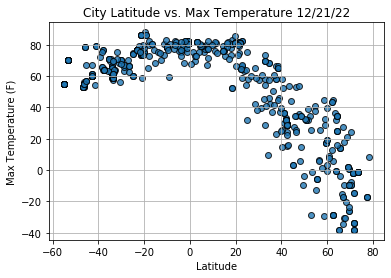

In [34]:
# Import time module

import matplotlib.pyplot as plt

import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

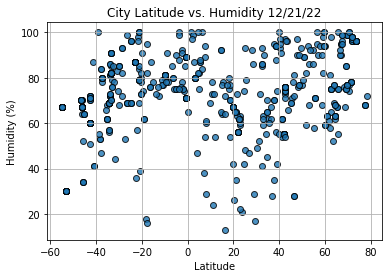

In [35]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")


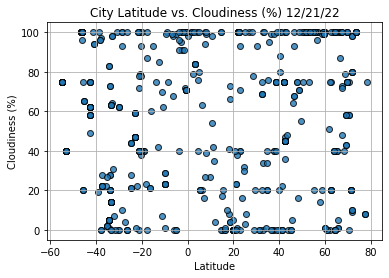

In [38]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")



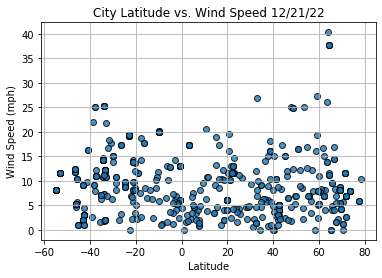

In [39]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")


